In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from os.path import join
from matplotlib.colors import LinearSegmentedColormap
from seaborn.palettes import color_palette
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu

In [72]:
DATA_FOLDER = 'data'
RESULTS_FOLDER = 'results'
QUESTIONNAIRE = 'QuestionnaireData.csv'
EXTRAS_FOLDER = 'Extras'
num_participants = 164
remove_ids = [97, 105, 117]

subject_ids = [i for i in range(1, num_participants + 1) if i not in remove_ids]

In [73]:
questionnaire_data = pd.read_csv(f'{DATA_FOLDER}/{QUESTIONNAIRE}')
questionnaire_data = questionnaire_data[~questionnaire_data['subj'].isin(remove_ids)]
questionnaire_data.reset_index(drop=True, inplace=True)
questionnaire_data.shape

(161, 17)

In [74]:
def cliffs_delta(x, y):
    """Calculate Cliff's Delta (d) as an effect size for differences between two groups."""
    n1, n2 = len(x), len(y)
    more = sum(xi > yj for xi in x for yj in y)
    less = sum(xi < yj for xi in x for yj in y)
    return (more - less) / (n1 * n2)

# Gender Comparison in AQ Scores

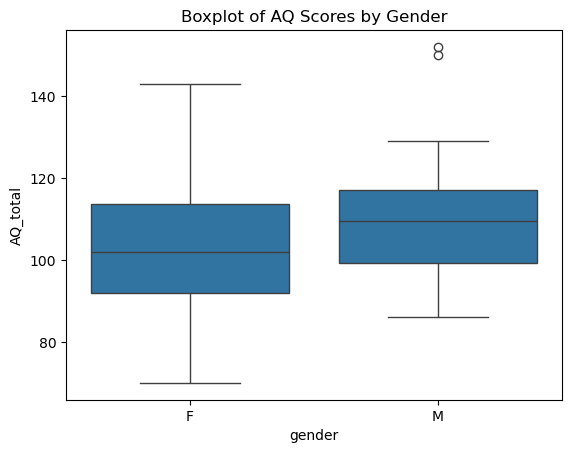

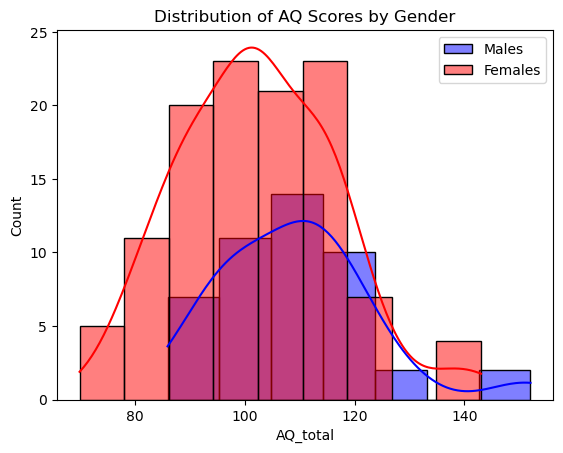

In [75]:
sns.boxplot(x='gender', y='AQ_total', data=questionnaire_data)
plt.title('Boxplot of AQ Scores by Gender')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Boxplot_of_AQ_Scores_by_Gender.png')
plt.show()

sns.histplot(questionnaire_data[questionnaire_data['gender'] == 'M']['AQ_total'], color="blue", label="Males", kde=True)
sns.histplot(questionnaire_data[questionnaire_data['gender'] == 'F']['AQ_total'], color="red", label="Females", kde=True)
plt.title('Distribution of AQ Scores by Gender')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Distribution_of_AQ_Scores_by_Gender.png')
plt.legend()
plt.show()

In [76]:
male_aq_data = questionnaire_data[questionnaire_data['gender'] == 'M']['AQ_total']
male_aq_data = male_aq_data[~male_aq_data.isna()]
female_aq_data = questionnaire_data[questionnaire_data['gender'] == 'F']['AQ_total']
female_aq_data = female_aq_data[~female_aq_data.isna()]

In [77]:
stat, p = shapiro(male_aq_data)
print('Shapiro-Wilk Test for Males: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(female_aq_data)
print('Shapiro-Wilk Test for Females: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test for Males: Statistics=0.935, p=0.013
Shapiro-Wilk Test for Females: Statistics=0.984, p=0.187


The Shapiro-Wilk test results you've provided indicate that the AQ scores for males are not normally distributed (p = 0.013 < 0.05), whereas the scores for females can be considered normally distributed (p = 0.187 > 0.05). Given that at least one of the groups (males) does not follow a normal distribution, it's appropriate to use a non-parametric test to compare the two groups.

Since the normality assumption is violated for the male group, the Mann-Whitney U test is more suitable for comparing the distribution of AQ scores between males and females. This test does not assume normality and is good for comparing medians between two independent samples. Further Mann-Whitney U test is robust to unequal sample sizes and outliers.

In [78]:
u_stat, u_p = mannwhitneyu(male_aq_data, female_aq_data)
print('Mann-Whitney U Test: Stat=%.3f, p=%.3f' % (u_stat, u_p))

Mann-Whitney U Test: Stat=3317.000, p=0.009


Since the p-value (0.009) is less than the typical significance level of 0.05, you can reject the null hypothesis. This suggests that there is a statistically significant difference in the distribution of AQ scores between male and female participants. This finding supports the alternative hypothesis that males are likely to score differently on the AQ compared to females.

In [79]:
# Calculate Cliff's Delta
cliffs_d = cliffs_delta(male_aq_data, female_aq_data)
print(f"Cliff's Delta: {cliffs_d:.3f}")

Cliff's Delta: 0.265


+ Cliff's Delta being positive suggests that males tend to score higher than females if the order in the calculations was males compared to females.
+ The magnitude of 0.265 indicates a small to moderate effect.
+ This size indicates that while there is a difference, it's not particularly strong or overwhelming but is statistically significant.

# Gender Comparison in SRS-A Scores

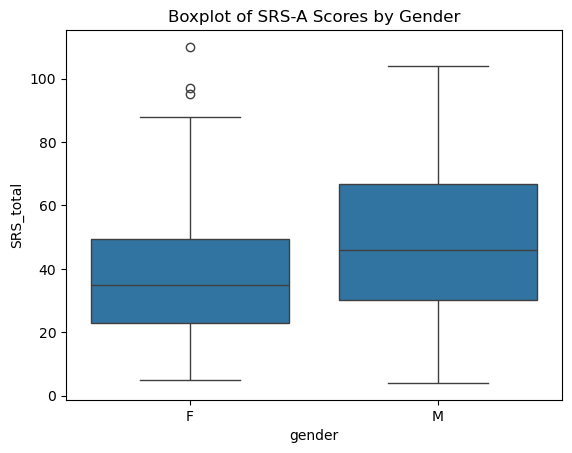

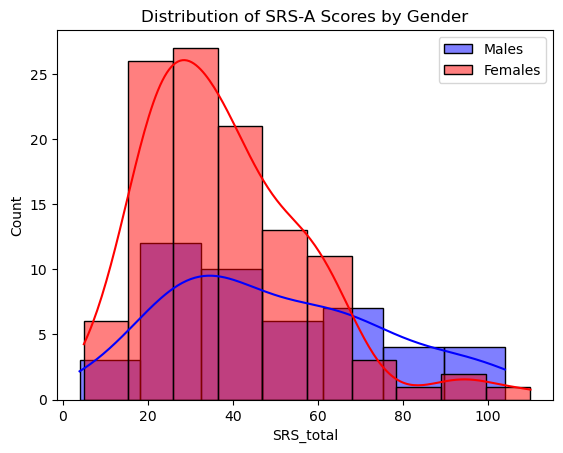

In [80]:
sns.boxplot(x='gender', y='SRS_total', data=questionnaire_data)
plt.title('Boxplot of SRS-A Scores by Gender')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Boxplot_of_SRS-A_Scores_by_Gender.png')
plt.show()

sns.histplot(questionnaire_data[questionnaire_data['gender'] == 'M']['SRS_total'], color="blue", label="Males", kde=True)
sns.histplot(questionnaire_data[questionnaire_data['gender'] == 'F']['SRS_total'], color="red", label="Females", kde=True)
plt.title('Distribution of SRS-A Scores by Gender')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Distribution_of_SRS-A_Scores_by_Gender.png')
plt.legend()
plt.show()

In [81]:
male_srs_data = questionnaire_data[questionnaire_data['gender'] == 'M']['SRS_total']
male_srs_data = male_srs_data[~male_srs_data.isna()]
female_srs_data = questionnaire_data[questionnaire_data['gender'] == 'F']['SRS_total']
female_srs_data = female_srs_data[~female_srs_data.isna()]

In [82]:
stat, p = shapiro(male_srs_data)
print('Shapiro-Wilk Test for Males: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(female_srs_data)
print('Shapiro-Wilk Test for Females: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test for Males: Statistics=0.960, p=0.115
Shapiro-Wilk Test for Females: Statistics=0.927, p=0.000


In [83]:
u_stat, u_p = mannwhitneyu(male_srs_data, female_srs_data)
print('Mann-Whitney U Test: Stat=%.3f, p=%.3f' % (u_stat, u_p))

Mann-Whitney U Test: Stat=3285.000, p=0.005


In [84]:
# Calculate Cliff's Delta
cliffs_d = cliffs_delta(male_srs_data, female_srs_data)
print(f"Cliff's Delta: {cliffs_d:.3f}")

Cliff's Delta: 0.287


+ The magnitude of 0.287 is considered small to moderate. While not overwhelming, it is significant enough to warrant attention
+ Direction: The positive direction of Cliff’s Delta indicates that the first group in our analysis (presumably the one mentioned first in your data comparison) scores higher on average than the second group. 

# Handedness Comparison in AQ Scores

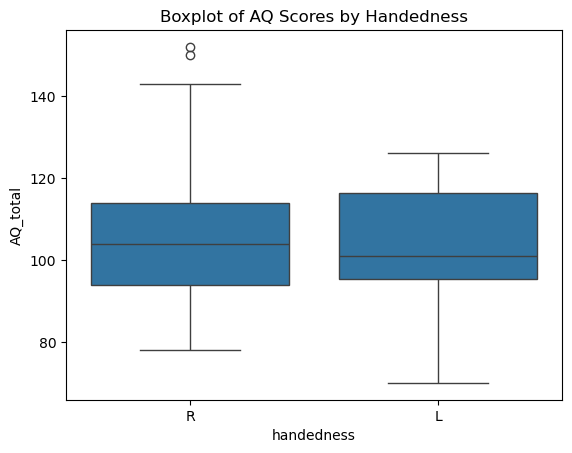

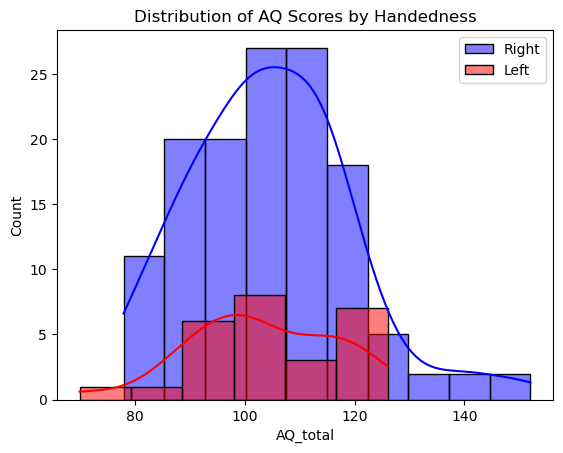

In [85]:
sns.boxplot(x='handedness', y='AQ_total', data=questionnaire_data)
plt.title('Boxplot of AQ Scores by Handedness')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Boxplot_of_AQ_Scores_by_Handedness.png')
plt.show()

sns.histplot(questionnaire_data[questionnaire_data['handedness'] == 'R']['AQ_total'], color="blue", label="Right", kde=True)
sns.histplot(questionnaire_data[questionnaire_data['handedness'] == 'L']['AQ_total'], color="red", label="Left", kde=True)
plt.title('Distribution of AQ Scores by Handedness')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Distribution_of_AQ_Scores_by_Handedness.png')
plt.legend()
plt.show()

In [86]:
right_aq_data = questionnaire_data[questionnaire_data['handedness'] == 'R']['AQ_total']
right_aq_data = right_aq_data[~right_aq_data.isna()]
left_aq_data = questionnaire_data[questionnaire_data['handedness'] == 'L']['AQ_total']
left_aq_data = left_aq_data[~left_aq_data.isna()]

In [87]:
stat, p = shapiro(right_aq_data)
print('Shapiro-Wilk Test for Right: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(left_aq_data)
print('Shapiro-Wilk Test for Left: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test for Right: Statistics=0.972, p=0.007
Shapiro-Wilk Test for Left: Statistics=0.962, p=0.432


In [88]:
u_stat, u_p = mannwhitneyu(right_aq_data, left_aq_data)
print('Mann-Whitney U Test: Stat=%.3f, p=%.3f' % (u_stat, u_p))

Mann-Whitney U Test: Stat=1777.000, p=0.873


In [89]:
# Calculate Cliff's Delta
cliffs_d = cliffs_delta(right_aq_data, left_aq_data)
print(f"Cliff's Delta: {cliffs_d:.3f}")

Cliff's Delta: 0.020


+ Stat=1777.000, p=0.873 - This p-value is well above the conventional alpha level of 0.05, suggesting that there is no statistically significant difference in the medians of the two groups. In other words, based on the data you provided, the "Right" and "Left" groups do not differ significantly in terms of the variable being measured.
+ Delta=0.020 - Cliff's Delta, being very close to zero (0.020), indicates a negligible effect size. This means that the magnitude of difference between the groups is minimal, further supporting the lack of meaningful difference as indicated by the Mann-Whitney U test.

# Handedness Comparison in SRS-A Scores

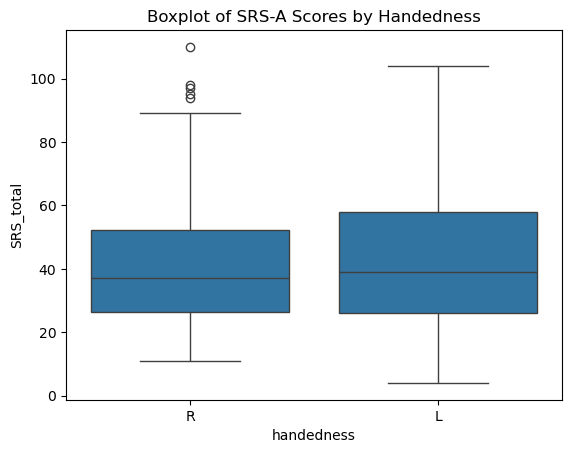

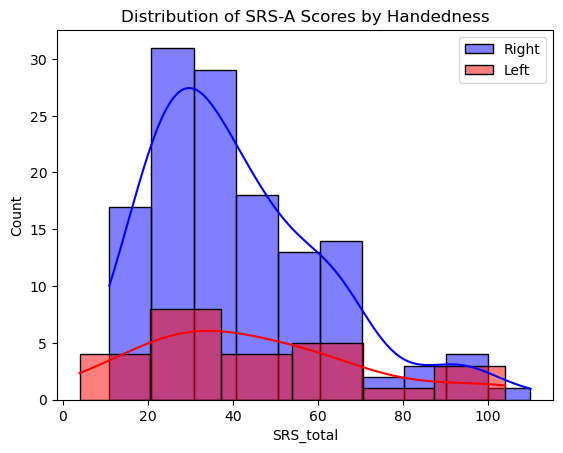

In [90]:
sns.boxplot(x='handedness', y='SRS_total', data=questionnaire_data)
plt.title('Boxplot of SRS-A Scores by Handedness')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Boxplot_of_SRS-A_Scores_by_Handedness.png')
plt.show()

sns.histplot(questionnaire_data[questionnaire_data['handedness'] == 'R']['SRS_total'], color="blue", label="Right", kde=True)
sns.histplot(questionnaire_data[questionnaire_data['handedness'] == 'L']['SRS_total'], color="red", label="Left", kde=True)
plt.title('Distribution of SRS-A Scores by Handedness')
plt.savefig(f'{RESULTS_FOLDER}/{EXTRAS_FOLDER}/Distribution_of_SRS-A_Scores_by_Handedness.png')
plt.legend()
plt.show()

In [91]:
right_srs_data = questionnaire_data[questionnaire_data['handedness'] == 'R']['SRS_total']
right_srs_data = right_srs_data[~right_srs_data.isna()]
left_srs_data = questionnaire_data[questionnaire_data['handedness'] == 'L']['SRS_total']
left_srs_data = left_srs_data[~left_srs_data.isna()]

In [92]:
stat, p = shapiro(right_srs_data)
print('Shapiro-Wilk Test for Right: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(left_srs_data)
print('Shapiro-Wilk Test for Left: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test for Right: Statistics=0.929, p=0.000
Shapiro-Wilk Test for Left: Statistics=0.939, p=0.137


In [93]:
u_stat, u_p = mannwhitneyu(right_srs_data, left_srs_data)
print('Mann-Whitney U Test: Stat=%.3f, p=%.3f' % (u_stat, u_p))

Mann-Whitney U Test: Stat=1552.000, p=0.640


In [94]:
# Calculate Cliff's Delta
cliffs_d = cliffs_delta(right_srs_data, left_srs_data)
print(f"Cliff's Delta: {cliffs_d:.3f}")

Cliff's Delta: -0.059


+ Stat=1552.000, p=-0.059 - This p-value is well above the conventional alpha level of 0.05, suggesting that there is no statistically significant difference in the medians of the two groups. In other words, based on the data you provided, the "Right" and "Left" groups do not differ significantly in terms of the variable being measured.
+ Delta=-0.059 - Cliff's Delta, being very close to zero (-0.059), indicates a negligible effect size. This means that the magnitude of difference between the groups is minimal, further supporting the lack of meaningful difference as indicated by the Mann-Whitney U test.

# Is handedness a factor in deck preference for gambling task

In [1]:
DATA_FOLDER = 'data'
RESULTS_FOLDER = 'results/Extras/'
GAMBLING_TASK = 'GamblingTask'
QUESTIONNAIRE = 'QuestionnaireData.csv'

num_participants = 164
remove_ids = [97, 105, 117, 36, 44, 90, 93, 95, 106, 134, 136, 155]

subject_ids = [i for i in range(1, num_participants + 1) if i not in remove_ids]

In [4]:
questionnaire_data = pd.read_csv(f'{DATA_FOLDER}/{QUESTIONNAIRE}')
questionnaire_data = questionnaire_data[~questionnaire_data['subj'].isin(remove_ids)]
questionnaire_data.reset_index(drop=True, inplace=True)
questionnaire_data.shape

(152, 17)

In [5]:
# Read data for each participant and combine into a single dataframe
gambling_task_data = pd.DataFrame()

for subject_id in subject_ids:
    file_name = f"gambling_ppn{'0' + str(subject_id) if subject_id < 10 else str(subject_id)}.rtd"
    file_path = join(DATA_FOLDER, GAMBLING_TASK, file_name)
    temp_df = pd.read_csv(file_path, sep="\t", header=0)
    gambling_task_data = pd.concat([gambling_task_data, temp_df], ignore_index=True)
gambling_task_data.shape

(30400, 12)

In [6]:
# get preference for most right deck chosen (r=4) for right handed participants (questionnaire_data['handedness']='R')
right_handed = questionnaire_data[questionnaire_data['handedness'] == 'R']
left_handed = questionnaire_data[questionnaire_data['handedness'] == 'L']
# questionnaire_data.shape
right_handed.shape, left_handed.shape

((127, 17), (25, 17))

In [7]:
def calculate_deck_preference(hand_data, task_data, deck_choice):
    # Merge hand data with gambling task data
    merged_data = hand_data.merge(task_data, left_on='subj', right_on='ppnr')
    
    # Filter data for specified deck choice
    deck_pref_data = merged_data[merged_data['r'] == deck_choice]
    return deck_pref_data

In [9]:
merged_data_right = right_handed.merge(gambling_task_data, left_on='subj', right_on='ppnr')
merged_data_right.head()

,subj,age,gender,handedness,AQ_total,AQ_social,AQ_switch,AQ_detail,AQ_comm,AQ_imag,...,trialnr,amount_won,W_value_win,X_value_win,Y_value_win,Z_value_win,r,real_r,rt,money
0,1,20,F,R,142.0,29.0,34.0,27.0,22.0,30.0,...,1,261,250,254,261,221,3,2,3382.797852,0
1,1,20,F,R,142.0,29.0,34.0,27.0,22.0,30.0,...,2,250,250,238,250,195,3,2,4121.829102,261
2,1,20,F,R,142.0,29.0,34.0,27.0,22.0,30.0,...,3,245,250,245,181,247,4,1,4647.511719,511
3,1,20,F,R,142.0,29.0,34.0,27.0,22.0,30.0,...,4,138,250,268,210,138,1,3,2726.879883,756
4,1,20,F,R,142.0,29.0,34.0,27.0,22.0,30.0,...,5,233,250,259,233,182,3,2,2387.823242,894


In [10]:
merged_data_left = left_handed.merge(gambling_task_data, left_on='subj', right_on='ppnr')
merged_data_left.head()

,subj,age,gender,handedness,AQ_total,AQ_social,AQ_switch,AQ_detail,AQ_comm,AQ_imag,...,trialnr,amount_won,W_value_win,X_value_win,Y_value_win,Z_value_win,r,real_r,rt,money
0,12,19,M,L,119.0,20.0,29.0,25.0,23.0,22.0,...,1,89,250,240,239,89,2,3,1031.769653,0
1,12,19,M,L,119.0,20.0,29.0,25.0,23.0,22.0,...,2,262,250,225,262,208,3,2,976.571167,89
2,12,19,M,L,119.0,20.0,29.0,25.0,23.0,22.0,...,3,250,250,245,247,288,1,0,947.527771,351
3,12,19,M,L,119.0,20.0,29.0,25.0,23.0,22.0,...,4,235,250,235,221,119,4,1,455.657196,601
4,12,19,M,L,119.0,20.0,29.0,25.0,23.0,22.0,...,5,251,250,252,251,454,3,2,311.779816,836


In [11]:
from scipy import stats

# Perform Shapiro-Wilk test for normality
shapiro_right = stats.shapiro(merged_data_right['r'])
shapiro_left = stats.shapiro(merged_data_left['r'])

# Perform Levene's test for homogeneity of variances
levene_statistic, levene_p_value = stats.levene(merged_data_right['r'], merged_data_left['r'])

# Print the results
print("Shapiro-Wilk Test for Normality:")
print("Right-handed individuals preferring right-most decks:", shapiro_right)
print("Right-handed individuals preferring left-most decks:", shapiro_left)

print("\nLevene's Test for Homogeneity of Variances:")
print("Levene's Test Statistic:", levene_statistic)
print("P-Value:", levene_p_value)

# Check the assumptions
if all(p > 0.05 for p in [shapiro_right[1], shapiro_left[1]]):
    print("All groups are normally distributed.")
else:
    print("At least one group is not normally distributed.")

if levene_p_value > 0.05:
    print("Homogeneity of variances is satisfied.")
else:
    print("Homogeneity of variances is not satisfied.")

Shapiro-Wilk Test for Normality:
Right-handed individuals preferring right-most decks: ShapiroResult(statistic=0.8545059501592535, pvalue=9.616668063794821e-91)
Right-handed individuals preferring left-most decks: ShapiroResult(statistic=0.8594697615749483, pvalue=4.156046615596932e-55)

Levene's Test for Homogeneity of Variances:
Levene's Test Statistic: 14.199842414619967
P-Value: 0.00016469461883807167
At least one group is not normally distributed.
Homogeneity of variances is not satisfied.


C:\Users\aabhi\AppData\Local\Temp\ipykernel_54336\1733816809.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25400.
  shapiro_right = stats.shapiro(merged_data_right['r'])


Since neither normality or homogeneity of variances is satisfied, we cannot use a t-test for this hypothesis

## Visualising the distribution

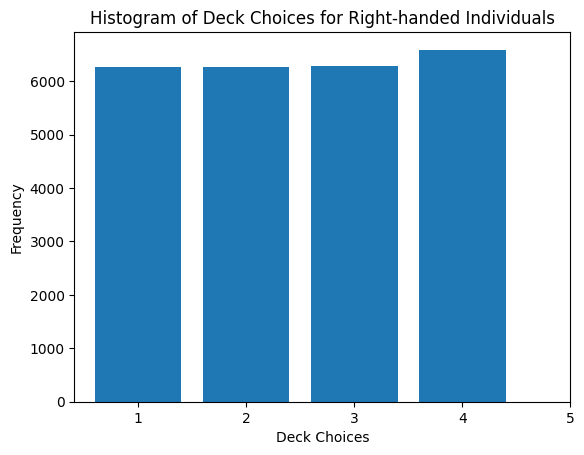

In [12]:
deck_choices = merged_data_right['r']

# Create a histogram of deck choices
plt.hist(deck_choices, bins=range(1, 6), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('Deck Choices')
plt.ylabel('Frequency')
plt.title('Histogram of Deck Choices for Right-handed Individuals')

# Set x-axis ticks
plt.xticks(range(1, 6))

# Show the plot
plt.show()

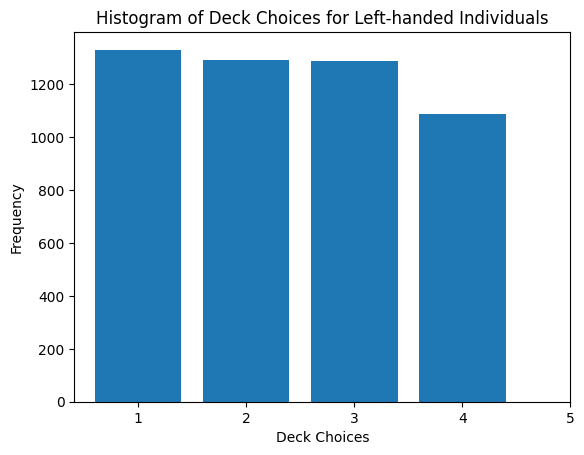

In [13]:
deck_choices = merged_data_left['r']

# Create a histogram of deck choices
plt.hist(deck_choices, bins=range(1, 6), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('Deck Choices')
plt.ylabel('Frequency')
plt.title('Histogram of Deck Choices for Left-handed Individuals')

# Set x-axis ticks
plt.xticks(range(1, 6))

# Show the plot
plt.show()

In [14]:
u_statistic, mann_whitney_p_value = stats.mannwhitneyu(merged_data_right['r'], merged_data_left['r'])

# Print the results
print("Mann-Whitney U test:")
print("U-Statistic:", u_statistic)
print("P-Value:", mann_whitney_p_value)

# Check the significance
if mann_whitney_p_value < 0.05:
    print("Reject null hypothesis. Handedness likely affects deck preference.")
else:
    print("Fail to reject null hypothesis. Handedness might not affect deck preference.")

Mann-Whitney U test:
U-Statistic: 66440101.0
P-Value: 8.635624545355963e-08
Reject null hypothesis. Handedness likely affects deck preference.


The p-value from Mann-Whitney U-test is very low (<0.05). This suggests that handedness might have a role in which deck a particular subject chose.